In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [3]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [4]:
print(x_train[0])
print(x_train[0].shape)

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)

# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

Metal device set to: Apple M1 Max


2022-05-02 20:02:52.658553: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-02 20:02:52.658685: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# Compile and fit
# Note: make sure you are using hte GPU for this!
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

2022-05-02 20:02:53.464555: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-02 20:02:53.466596: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2022-05-02 20:02:53.720308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.3044 - accuracy: 0.5491

2022-05-02 20:03:14.819389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 23s 13ms/step - loss: 1.3044 - accuracy: 0.5491 - val_loss: 1.0279 - val_accuracy: 0.6372
Epoch 2/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8283 - accuracy: 0.7111 - val_loss: 1.0143 - val_accuracy: 0.6409
Epoch 3/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6668 - accuracy: 0.7700 - val_loss: 0.8022 - val_accuracy: 0.7234
Epoch 4/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5548 - accuracy: 0.8080 - val_loss: 0.6275 - val_accuracy: 0.7876
Epoch 5/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.4684 - accuracy: 0.8374 - val_loss: 0.8787 - val_accuracy: 0.7227
Epoch 6/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3965 - accuracy: 0.8625 - val_loss: 0.5995 - val_accuracy: 0.8048
Epoch 7/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3372 - accuracy: 0.8838 - val_loss: 0.5828 - val_accura

In [8]:
# Fit with data augmentation
# Node: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, 
                                    height_shift_range=0.1, 
                                    horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
# r = model.fit_generator(train_generator, 
#                         validation_data=(x_test, y_test), 
#                         steps_per_epoch=steps_per_epoch, epochs=50)
r = model.fit(train_generator, 
                        validation_data=(x_test, y_test), 
                        steps_per_epoch=steps_per_epoch, epochs=30)

Epoch 1/30
   1/1562 [..............................] - ETA: 6:32 - loss: 1.1711 - accuracy: 0.8125

2022-05-02 20:20:19.335379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1562/1562 [==============================] - 23s 15ms/step - loss: 0.5679 - accuracy: 0.8204 - val_loss: 0.5040 - val_accuracy: 0.8347
Epoch 2/30
1562/1562 [==============================] - 22s 14ms/step - loss: 0.4447 - accuracy: 0.8533 - val_loss: 0.4699 - val_accuracy: 0.8492
Epoch 3/30
1562/1562 [==============================] - 22s 14ms/step - loss: 0.4118 - accuracy: 0.8627 - val_loss: 0.4599 - val_accuracy: 0.8466
Epoch 4/30
1562/1562 [==============================] - 22s 14ms/step - loss: 0.3840 - accuracy: 0.8719 - val_loss: 0.4803 - val_accuracy: 0.8435
Epoch 5/30
1562/1562 [==============================] - 22s 14ms/step - loss: 0.3641 - accuracy: 0.8789 - val_loss: 0.4494 - val_accuracy: 0.8532
Epoch 6/30
1562/1562 [==============================] - 22s 14ms/step - loss: 0.3539 - accuracy: 0.8822 - val_loss: 0.4625 - val_accuracy: 0.8512
Epoch 7/30
1562/1562 [==============================] - 22s 14ms/step - loss: 0.3371 - accuracy: 0.8852 - val_loss: 0.4420 - val_accura

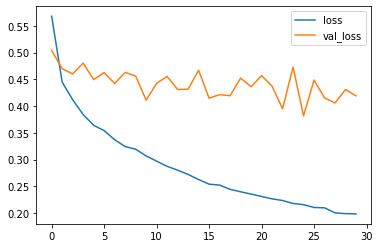

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

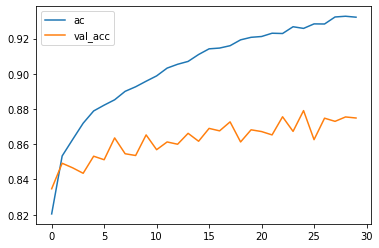

In [10]:
# Plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='ac')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

2022-05-02 20:31:21.783749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Consusion matrix, without normalization
[[918   5  24   4   8   0   8   1  24   8]
 [  6 947   2   0   0   0   9   0   9  27]
 [ 34   2 807  39  32  13  56   9   5   3]
 [ 13   1  28 764  24  70  74  11   6   9]
 [  4   0  28  31 867  15  39  12   2   2]
 [  7   1  22 148  31 735  34  16   3   3]
 [  3   1  14  18   5   1 955   0   1   2]
 [ 15   4   7  17  29  24   6 892   1   5]
 [ 39   3   3   5   0   1   4   0 931  14]
 [ 12  28   3   6   1   1   4   1  11 933]]


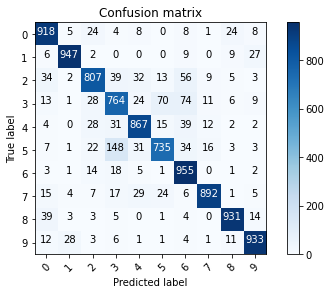

In [11]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be appled by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("normalized confusion matrix")
  else:
    print('Consusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [12]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

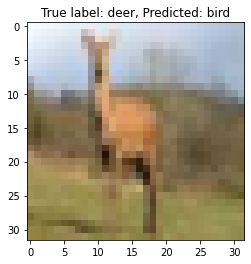

In [13]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s, Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [14]:
# Now that the model is so large, it's useful to summarie it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 